Counter({0: 9990, 1: 10})


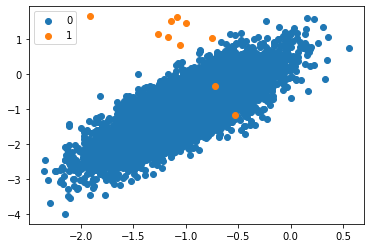

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [2]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)

# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)

# detect outliers in the test set
yhat = model.predict(testX)

# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1

# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.123


In [3]:
# isolation forest for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# define outlier detection model
model = IsolationForest(contamination=0.01)

# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)

# detect outliers in the test set
yhat = model.predict(testX)

# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1

# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.000


In [4]:
# elliptic envelope for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# define outlier detection model
model = EllipticEnvelope(contamination=0.01)

# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)

# detect outliers in the test set
yhat = model.predict(testX)

# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1

# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.157


In [5]:
# local outlier factor for imbalanced classification
from numpy import vstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import LocalOutlierFactor

# make a prediction with a lof model
def lof_predict(model, trainX, testX):
    # create one large dataset
    composite = vstack((trainX, testX))
    
    # make prediction on composite dataset
    yhat = model.fit_predict(composite)
    
    # return just the predictions on the test set
    return yhat[len(trainX):]

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# define outlier detection model
model = LocalOutlierFactor(contamination=0.01)

# get examples for just the majority class
trainX = trainX[trainy==0]

# detect outliers in the test set
yhat = lof_predict(model, trainX, testX)

# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1

# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F-measure: %.3f' % score)

F-measure: 0.138
